In [4]:
from scipy.stats import spearmanr
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Early Head Start Research and Evaluation (EHSRE) Study, 1996-2010
> Early Head Start Programs focus on enhancing early childhood development for low-income children from birth to age 3 [(Love, Elianson-Kisker, & Brooks-Gunn, 2004)](https://doi.org/10.3886/ICPSR03804.v5). Both Head Start, and Early Head Start, are federal programs prepapring low-income children for school by supporting their congitive and emotional development. Program curriculum supports a wide variety of early learning with a focus on language and literacy. The purpose of the Early Head Start Research and Evaluation Study(EHSRE; 1996-2010) was to twofold. First, researchers documented the experiences of the families enrolled in Head Start programs using the Family and Child Experiences Survey (FACES, 1997). Second, FACES assessed the academic outcomes in Early Head Start. 

# Research Questions
> FACES measured the cognitive, social, emotional and physical development of Head Start children along with their familial history. Researchers were initially interested in the basic demographic composition of children and families enrolled in Early Head Start along with how the program impacted their academic success. Outside of home environment, FACES also assessed variables critical for children's overall well-being. 

> Reducing the amount of poverty in the United States is a major theme of the Head Start programs [(Zigler & Valentine, 1979)](https://eric.ed.gov/?id=ED183266). A substantial amount of research has documented many adverse links between poverty in early childhood and education. Residing in low-income neighborhoods is associated with increased rates of academic failure such as grade dropout [(Rokosa, 2011)](https://www.americanprogress.org/issues/poverty/news/2011/10/20/10547/fighting-the-war-on-poverty-with-early-childhood-education/). Startlingly, research even finds neurological disadvatnages of children from poverty. Poor children exhibit structural brain differences with lower hippocampus and frontal lobe volume  compared to non-poor children [(Katsnelson, 2015)](http://www.pnas.org/content/112/51/15530.full). 

> This report builds on the initial research questions from the EHSRE Study(1996-2010) by focusing on the relationships among poverty and early childhood by asking:
1. Is the level of family poverty related to how many books children have in their homes?
2. Does the level of family poverty affect how much parents help their children with homework?
3. Is poverty related to poorer academic performance in math and vocabulary?  


# Description of EHSRE Variables
> Data in this report were obtained from the [Early Head Start Research and Evaluation Study](https://doi.org/10.3886/ICPSR03804.v5) by the United States Department of Health and Human Services, Administration for Children and Families. [Child Care & Early Education Research Connections](http://www.researchconnections.org/childcare/welcome) provided the data to the general public fulfillg its mission to inform public policy from high-quality research through releasing free datasets.  

> There are a total of 1059 variables collected between 1996-2010 in the EHSRE study. This report includes 1983908193 variables related to early childhood developememt. It's hypothesized these variables potentially affect:cognitive, social, and emotional development. Focusing on development in early child is essential since toddlers, as well as older children, are at a criticial period for these skills to develop.  

 > The variables selected for this stidy belong to four research areas known to affect early childhood. First, there is an extensive literature analyzing the home life of children in low-income families.  Second, researchers documented the academic and personal histories of adult caregivers. Third, researchers are concerned with the level of accademic support for children recieved outside of school. The fourth category belonging to early development are the actual outcomes variables such as, academic performance in math and reading. 
 
 > Presented below is each variable in this report and related developmental category.
 
 > 1. Family History:
 * a. Level of poverty for each family
 * b. Annual family income
 
 > 2. Home life:
 * a. The number of books each child has at home
 * b. The number of times parents help children with their homework
 * c. monthly access to food(food security)
 
 > 3. Academic outcomes:
 * a. Math standardized test results
 * b. Vocabularly comprehension
 
   

# Family History 

In [5]:
# create a variable name from the original EHSRE code book.
early = pd.read_csv('EHSRE_data.csv')
early['poverty_ratio'] = early['POVRATIO']
del early['POVRATIO']

# examine the normality of the family history variable, level of family poverty
early['poverty_ratio'].describe()



count    756.000000
mean      63.909484
std       51.978235
min        0.000000
25%       29.807500
50%       56.760000
75%       87.940000
max      384.360000
Name: poverty_ratio, dtype: float64

In [6]:
# create a variable name from the original EHSRE code book.
early['income']= early['B5P_INYC']
del early['B5P_INYC']

# examine the normality of the family history variable, annual income
early['income'].describe()


count       756.000000
mean      36935.185185
std       31240.083440
min        2500.000000
25%       17500.000000
50%       27500.000000
75%       45000.000000
max      201000.000000
Name: income, dtype: float64

## Normality of family history variable: level of family poverty
> The level of poverty per family is measured by multiplying family income by 100 and then dividing by the federal poverty level. Ratio values less than 100% are considered "in poverty" and incomes 50% below their poverty threshold are in "deep poverty". Below are the complete income categories used to officiallly measure poverty in the United States:ratios that compare the income levels of people or families with their poverty threshold:
* Values > 100% "above poverty"
* < 125% Values > 100% "near poverty"
* Values < 100% "in poverty"
* Values < 50% "in deep poverty"

>The boxplot shows the median ratio of income to poverty threshold is just above 50%. The poverty ratios of families participating in the FACES survey are defintley skewed with the presence of outliers over 100% their income to poverty threshhold. The histogram also supports a positively skewed distribution with most values below the mean at 63.91% of income to poverty threshold. 

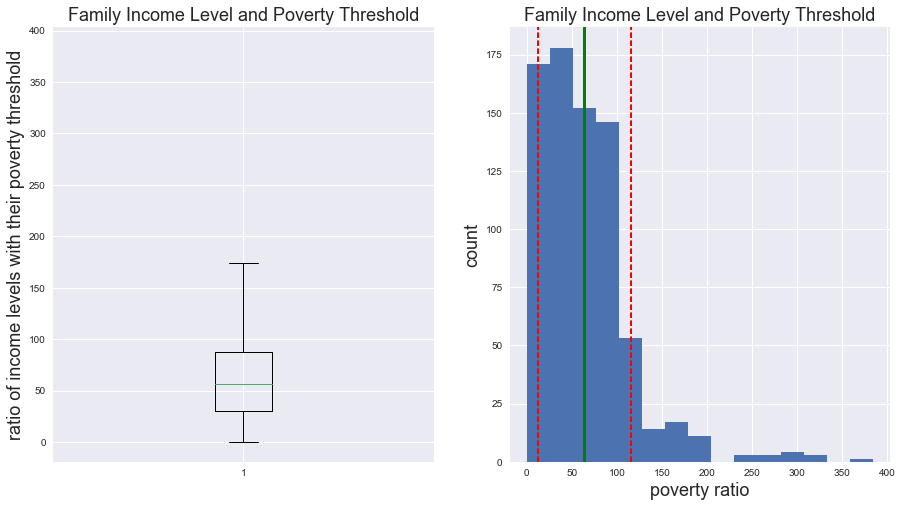

In [7]:
# what does the distribution of family poverty ratio look like when plotted as a boxplot and histogram?
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.boxplot(early['poverty_ratio'])
plt.ylabel('ratio of income levels with their poverty threshold',fontsize=18)
plt.title('Family Income Level and Poverty Threshold', fontsize=18)

plt.subplot(1, 2, 2)
plt.hist(early['poverty_ratio'], bins= 15)
center = np.mean(early['poverty_ratio'])
plt.ylabel('count',fontsize=18)
plt.xlabel('poverty ratio', fontsize=18)
plt.title('Family Income Level and Poverty Threshold', fontsize=18)
plt.axvline(x = np.mean(early['poverty_ratio']), linewidth= 3, color="green")
plt.axvline(np.mean(early['poverty_ratio']) - np.std(early['poverty_ratio']), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(early['poverty_ratio']) + np.std(early['poverty_ratio']), color='r', linestyle='dashed', linewidth=2)
plt.show()

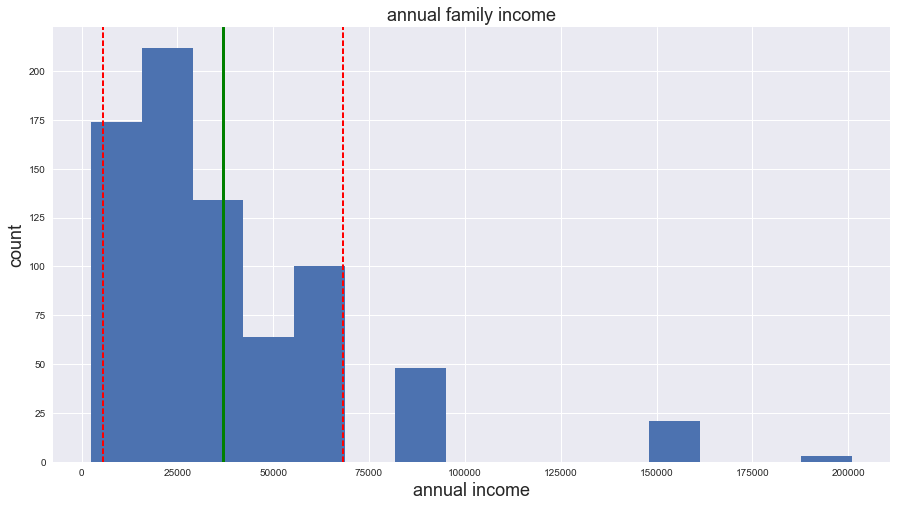

In [8]:
# what does the distribution of annual income look like when plotted as a  histogram?
plt.figure(figsize=(15, 8))
plt.hist(early['income'], bins= 15)
center = np.mean(early['income'])
plt.xlabel('annual income', fontsize=18)
plt.title('annual family income', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.axvline(x = np.mean(early['income']), linewidth= 3, color="green")
plt.axvline(np.mean(early['income']) - np.std(early['income']), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(early['income']) + np.std(early['income']), color='r', linestyle='dashed', linewidth=2)
plt.show()

# Home Life

In [9]:
# create a variable name from the original EHSRE code book.
early['help_homework'] = early['B5PHLPHW']
del early['B5PHLPHW']
# examine the normality of the home life variable, help with homework
early['help_homework'].describe() 


count    756.000000
mean       3.272487
std        0.874107
min        1.000000
25%        3.000000
50%        3.500000
75%        4.000000
max        4.500000
Name: help_homework, dtype: float64

In [10]:
# examine the normality of the home life variable, how many books does the child have at home?
early['book_number'] = early['B5P467']
del early['B5P467']
early['book_number'].describe()

count    756.000000
mean      60.074074
std       84.803176
min        0.000000
25%       15.000000
50%       30.000000
75%       75.000000
max      999.000000
Name: book_number, dtype: float64

## Normality of family life variables: homework help and books at home
> A majority of parents helped their children with homework 3.5 followed by 3 times a month. There was a tie for the number of times parents helped children at 4 and 4.5 times a month. The number of books at home had a very spread distribution with most children having 60-100 books at home but a few own over 400-1,000 books. 

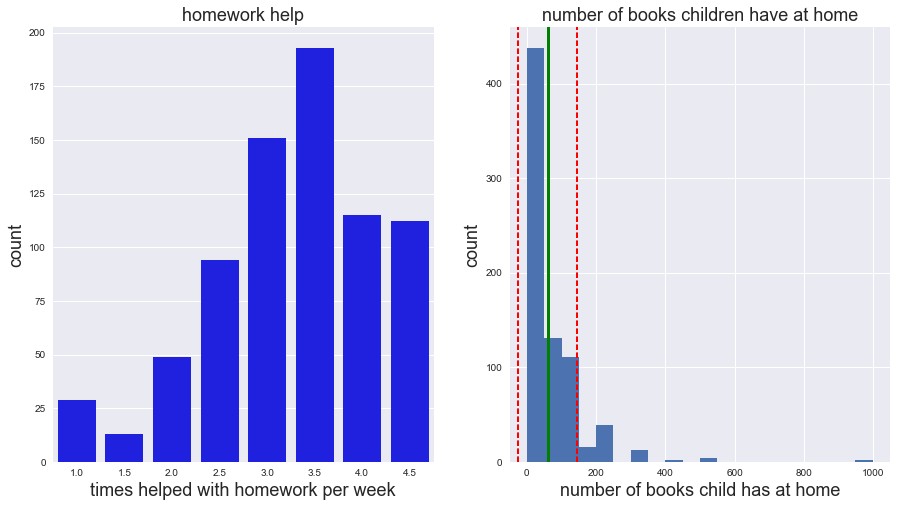

In [11]:
# what do the distributions of help with homework, how many books each child has, and food security look like when plotted ?

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1) 
ax = sns.countplot(early['help_homework'], color ="b")
ax.set(xlabel='number of times parent helps with homework', ylabel='count')
plt.title('homework help', fontsize=18)
plt.xlabel('times helped with homework per week', fontsize=18)
plt.ylabel('count', fontsize=18)


plt.subplot(1, 2, 2)
plt.hist(early['book_number'], bins= 20)
center = np.mean(early['book_number'])
plt.ylabel('count', fontsize=18)
plt.xlabel('number of books child has at home',fontsize=18)
plt.title('number of books children have at home', fontsize=18)
plt.axvline(x = np.mean(early['book_number']), linewidth= 3, color="green")
plt.axvline(np.mean(early['book_number']) - np.std(early['book_number']), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(early['book_number']) + np.std(early['book_number']), color='r', linestyle='dashed', linewidth=2)

plt.show()


> There are a number of extreme outliers in the number of books children own. The presence of some outlying scores of 400 - 1,000 books severley positivley skews the distribution. Owning more than 200 books is well above the average of 60 books at home. Thus, it's appropriate to remove extreme outliers beyond 125 books and replot this new distribution. 

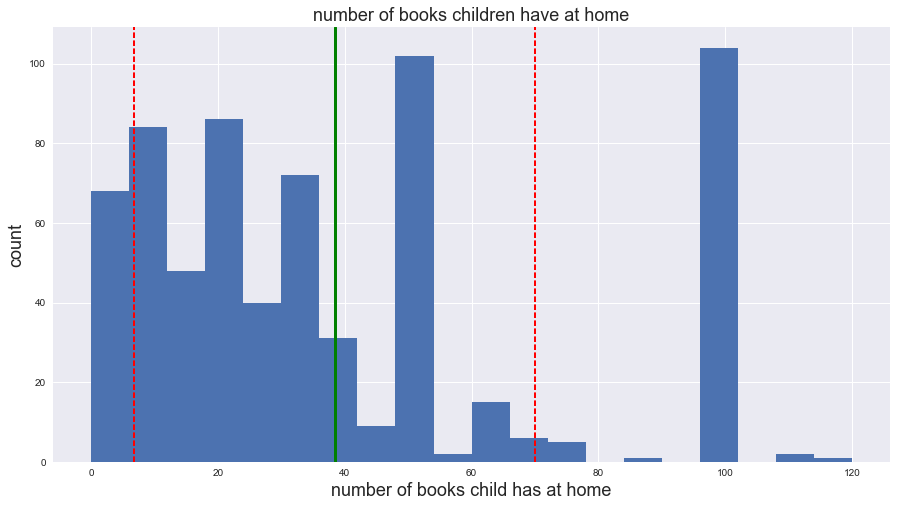

In [12]:
#Removing outliers boxplot showed outliers of children with more than 125 books
early= early[early['book_number'] < 125]

# reploting book number
plt.figure(figsize=(15, 8))

plt.hist(early['book_number'], bins= 20)
center = np.mean(early['book_number'])
plt.ylabel('count', fontsize=18)
plt.xlabel('number of books child has at home',fontsize=18)
plt.title('number of books children have at home', fontsize=18)
plt.axvline(x = np.mean(early['book_number']), linewidth= 3, color="green")
plt.axvline(np.mean(early['book_number']) - np.std(early['book_number']), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(early['book_number']) + np.std(early['book_number']), color='r', linestyle='dashed', linewidth=2)

plt.show()

## Frequency distribution of the family life variable: access to food
> Food access included only two discrete categories as response options. Thus, unlike other variables in this report, describing its normality would not make sense. FACES included two response options regarding family food security on a monthly basis. Children either did or did not have adequate amounts of food. Most families, over 600, reported access to adequate amounts of food. 


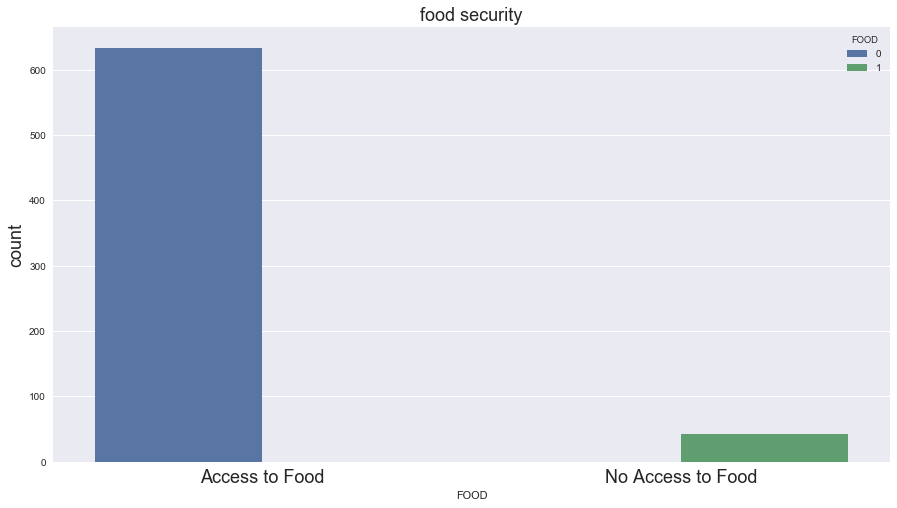

In [13]:
# summary statistics of how many families have monthly access to food

plt.figure(figsize=(15, 8))
ax = sns.countplot(early['FOOD'], hue= early['FOOD'])

ax.set_xticklabels(['Access to Food','No Access to Food'],fontsize=18, rotation='horizontal')
plt.title('food security', fontsize=18)
plt.ylabel('count', fontsize=18)

plt.show()

# Academic Outcomes

In [14]:
# create a variable name from the original EHSRE code book.
early['vocab'] = early['B1P_VCOM']
early['math'] = early['C5MATHRA']

# examine the normality of the academic variable, vocab
early['vocab'].describe()


count    676.000000
mean      47.576923
std       19.531665
min        2.000000
25%       34.000000
50%       47.000000
75%       62.000000
max       89.000000
Name: vocab, dtype: float64

In [15]:
# examine the normality of the academic variable, math
early['math'].describe()

count    676.000000
mean       8.318047
std        4.549745
min        0.000000
25%        5.000000
50%        8.000000
75%       12.000000
max       18.000000
Name: math, dtype: float64

## Normality of academic variables: math and vocabulary scores

> Vocabulary comprehension was measured on FACES using the MacArthur-Bates Communicative Development Inventories (CDIs). The McArthur captures children's early language development through parental report. Development of vocabulary comprehension is nearly normal with children scoring an average of 50 points, but equal amounts of children falling above and below this average. 
> Math achievement was measured on the Early Childhood Longitudinal Study (ECLS) 5th grade math assessment. It appears the mean score was an 8 out of a possible 18 suggesting it was a difficult test for most children. 


<function matplotlib.pyplot.show>

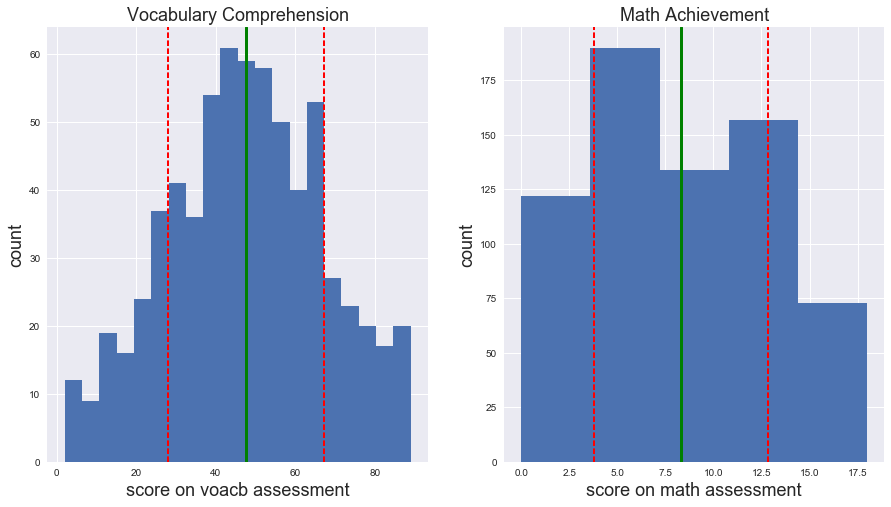

In [16]:
# what do the distributions of vocabularly and math scores look like when plotted?

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.hist(early['vocab'], bins= 20)
center = np.mean(early['vocab'])
plt.ylabel('count', fontsize=18)
plt.xlabel('score on voacb assessment', fontsize=18)
plt.title('Vocabulary Comprehension', fontsize=18)
plt.axvline(x = np.mean(early['vocab']), linewidth= 3, color="green")
plt.axvline(np.mean(early['vocab']) - np.std(early['vocab']), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(early['vocab']) + np.std(early['vocab']), color='r', linestyle='dashed', linewidth=2)

plt.subplot(1, 2, 2)
plt.hist(early['math'], bins= 5)
center = 8
plt.ylabel('count', fontsize=18)
plt.xlabel('score on math assessment', fontsize=18)
plt.title('Math Achievement', fontsize=18)
plt.axvline(x = np.mean(early['math']), linewidth= 3, color="green")
plt.axvline(np.mean(early['math']) - np.std(early['math']), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(early['math']) + np.std(early['math']), color='r', linestyle='dashed', linewidth=2)
plt.show


#  Research Question 1: Are poverty levels related to the number of books at home?

Aggregating books into bins makes it easier to see how books are related to other categorical or continous variables.

In [17]:
# create categories and names
bins = [0,30,40,50,60,70,80,90,100,110,125]
group_names = [0,30,40,50,60,70,80,90,100,110]

categories = early.groupby(pd.cut(early['book_number'], bins,labels=group_names)).count()
categories['number_of_books'] = categories['book_number']
del(categories['book_number'])
# after groupby or pd.cut
categories.reset_index()

,book_number,HGCG,RACE,FOOD,TRANSPRT,B5P_INCN,B5P_CESD,C5SUCCES2,B4FSAPPR,B1P_VPRD,C5C_SAD,C5MATHRA,B1P_VCOM,poverty_ratio,income,help_homework,vocab,math,number_of_books
0,0,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
1,30,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
2,40,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109
3,50,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
4,60,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
5,70,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
6,80,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,90,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102
8,100,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
9,110,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


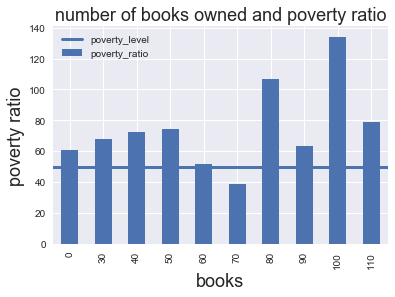

In [59]:
#plt.figure(figsize=(15, 8))

#categories.plot(kind='bar',y="poverty_ratio")
#plt.title('number of books owned and poverty ratio', fontsize=18)
#plt.xlabel('books', fontsize=18)
#plt.ylabel('poverty ratio', fontsize=18)
#plt.show()

#fig, ax = plt.subplots(figsize=(20, 10)

ax=plt.figure(figsize=(15, 8))

bins = [0,30,40,50,60,70,80,90,100,110,125]
group_names = [0,30,40,50,60,70,80,90,100,110]
categories = early.groupby(pd.cut(early['book_number'], bins,labels=group_names)).mean()
categories.plot(kind='bar',y="poverty_ratio")
plt.title('number of books owned and poverty ratio', fontsize=18)
plt.xlabel('books', fontsize=18)
plt.ylabel('poverty ratio', fontsize=18)
plt.axhline(y=50, linewidth= 3, label= "poverty_level")

plt.legend()

plt.show()


>The EHSRE used the number of books children have at home variable as a potnential indicator of lower socioeconomic status of families enrolled in the program. Lower risk groups, or families less likely to have single parents, reported owning less books at home. This aligns with the above graph indicating children, regardless of their socioeconomic status enjoy potentialy reading at least 60 or more books in their homes. 

## What about book numbers for children living in deep poverty?

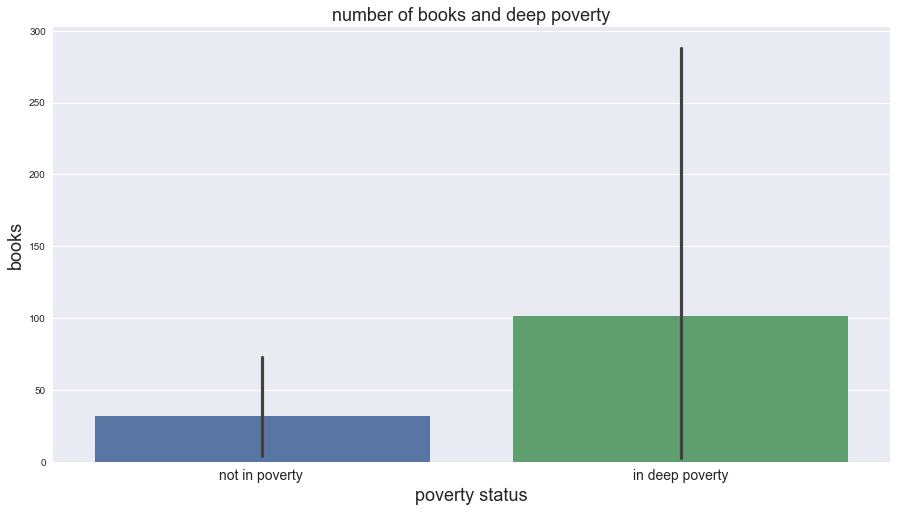

In [19]:
# filter children from families in deep poverty
early['poverty_ratio_deep'] = early['poverty_ratio'] <50

plt.figure(figsize=(15, 8))

ax = sns.barplot(y=categories["number_of_books"], x="poverty_ratio_deep", data=early)
ax.set_xticklabels(['not in poverty ','in deep poverty'],fontsize=14,rotation='horizontal')
plt.xlabel('poverty status', fontsize=18)
plt.ylabel('books', fontsize=18)
plt.title('number of books and deep poverty', fontsize=18)
plt.show()

> Overall, children in deep poverty reported owning almost double the number of books at home compared to the number of books from children not in deep poverty. This corroborates with previous evidence from the figure above suggesting children from lower income families in this sample possess many books.

## Is access to food related to book numbers and poverty?

It might be meaningful to examine poverty levels and book numbers for children with below the average of 38 books. Is access to food related to how much many books children own?

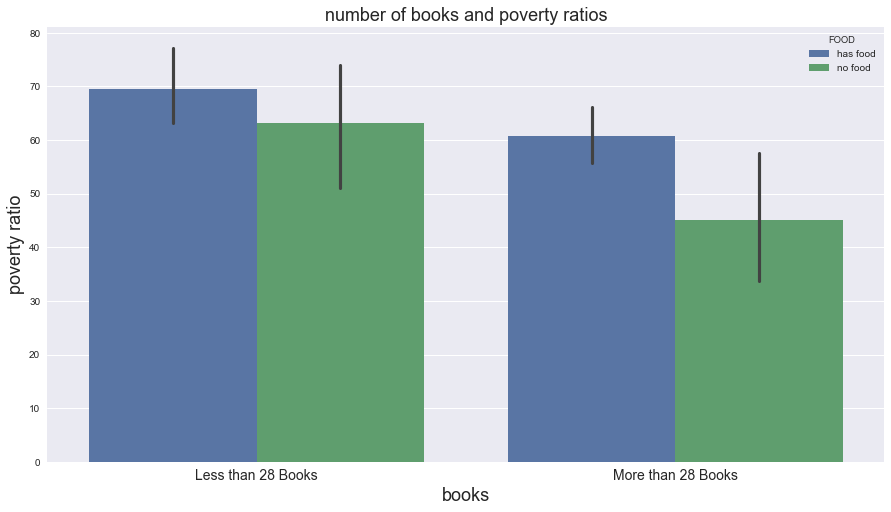

In [20]:
early['book_less'] = early['book_number'] <38
early['FOOD'] = early['FOOD'].map({0:'has food',1:'no food'})

plt.figure(figsize=(15, 8))
abar =sns.barplot(y="poverty_ratio", x='book_less',hue="FOOD", data=early)
abar.set(xlabel='books', ylabel='poverty ratio')
abar.set_xticklabels(['Less than 28 Books','More than 28 Books'],fontsize=14,rotation='horizontal')
plt.xlabel('books', fontsize=18)
plt.ylabel('poverty ratio', fontsize=18)
plt.title('number of books and poverty ratios', fontsize=18)
plt.show()


> In EHSRE, access to food was entered into a regression significantly predicting inadequate food access for children not enrolled in Early Head Start programs. The present report found children owning less than the average amount of 28 books and had access to food were slightly more above the poverty line (50%) than children with no access to food.

>Interestingly, children owning more than the average 28 books, also showed children with no food access were higher above the poverty line than children with no food access. Critically, this difference between groups was much more pronounced for children with more than 28 books. Why does this inequality between poverty ratios based on food access exist? 

## Other variables related to how many books children own?

It's likely book numbers are not only related to a few variables such as, access to food and poverty levels, but a combination of other relevant factors. Is the race of children in the FACES study related to book numbers?

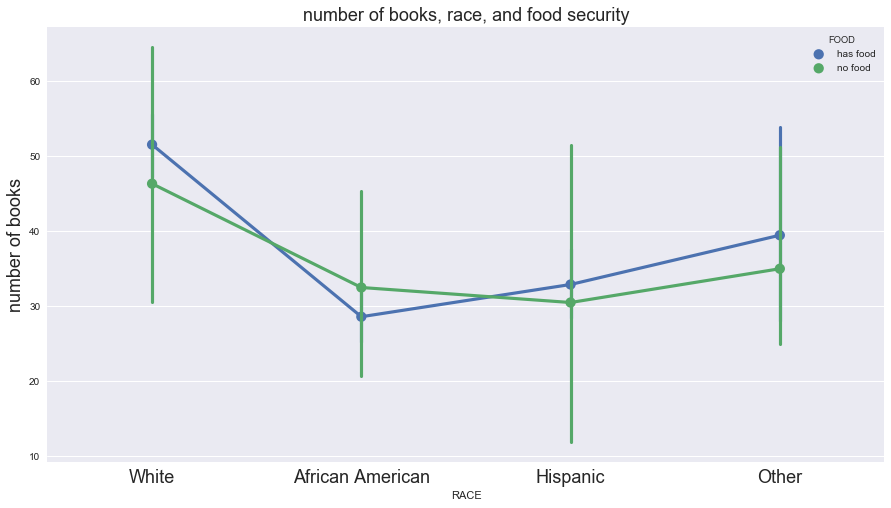

In [21]:
plt.figure(figsize=(15, 8))
ax = sns.pointplot(x="RACE", y="book_number", hue="FOOD", data=early)
ax.set_xticklabels(['White','African American', 'Hispanic', 'Other'],fontsize=18, rotation='horizontal')
plt.ylabel('number of books', fontsize=18)
plt.title('number of books, race, and food security', fontsize=18)
plt.show()

> According to EHSRE data, the number of books owned by families did not significantly predict families across all racial groups would have over the average 26 books at home. Therefore, race and book ownership outcomes might not be predictive indicators of early childhood education in the domain of home life. 

>However, visual inspection of the amove graph shows African American and Hispanic children tended to own less books compared to white children. When considering wethere these children had access to food, white children with access to food had slightly more books than white children without access to food. On the other hand, African American children without access to food had slightly more books than African American children with access to food. It would be interesting to see if these difference hold when only compairing less than 28 book amounts across racial groups. 

# Research Question 2: are poverty levels related to how much parents help children with their homework?

Once again like book number, FACES notes help with homework is a continous variable, yet it appears discrete. Aggregating values into bins makes it easier to visualize its distribution and how it is related to other types of variables. 

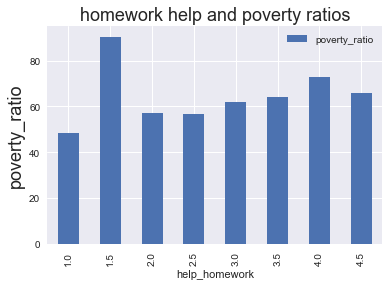

In [60]:
bins = [0,1,1.5,2,2.5,3,3.5,4,4.5]
group_names = [1,1.5,2,2.5,3,3.5,4,4.5]

help_categories = early.groupby(pd.cut(early['help_homework'], bins,labels=group_names)).mean()
help_categories['help_with_homework'] = help_categories['help_homework']
del(help_categories['help_homework'])
# after groupby or pd.cut
help_categories.reset_index()

plt.figure(figsize=(17, 9))
help_categories.plot(kind='bar',y="poverty_ratio")
plt.ylabel('poverty_ratio', fontsize=18)
plt.title('homework help and poverty ratios', fontsize=18)
plt.show()


> The EHSRE report indicated help with homework was not significantly related to home life variables. Unfortunately, EHSRE did not evaluate the relationship between homework help and poverty. This report found homework help seemed to be high regardless of family poverty levels.  

## For children living in deep poverty, how often do their parents help with homework? Are these amounts the same for children not living in deep poverty?

In [23]:
new_group = early.groupby(['help_homework', 'poverty_ratio_deep']).count()
new_group=new_group.reset_index()
new_group['poverty_ratio_deep'] = new_group['poverty_ratio_deep'].map({False:'not in deep poverty',True:'deep poverty'})

In [24]:
#new_group['poverty_ratio_deep'] = new_group['poverty_ratio_deep'].map({False:'no poverty',True:'poverty'})
#print(new_group)

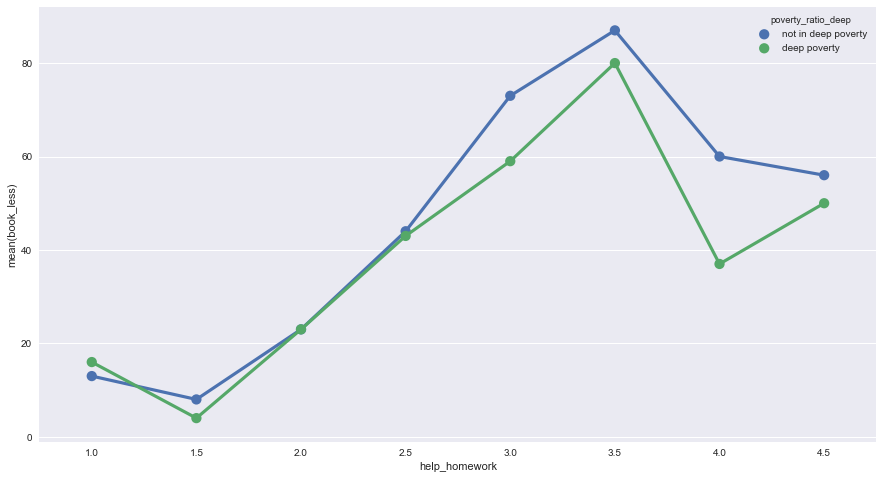

In [25]:
plt.figure(figsize=(15, 8))
ax = sns.pointplot(x=new_group.help_homework, y=new_group['book_less'], hue=new_group['poverty_ratio_deep'])

> The EHSRE study reported help with homework was not significantly related to any race group in the EHSRE study. In other words, parents did not provide more or less homework support among all racial groups. From the above graph, there are differences in homework support by poverty levels. If parents helped children with homework only 1-2.5 times a week it did not matter whether families were in deep poverty or not. 

>For families in deep poverty, receiving homework help 3 times a week was much higher for children not in deep poverty. This trend continued up to receiving help 4 times a week.

# Research Question 3: are poverty levels related to vocabulary and math scores?

What do the vocab and math distributions look like when plotted as seperate scatterplots with poverty ratios?

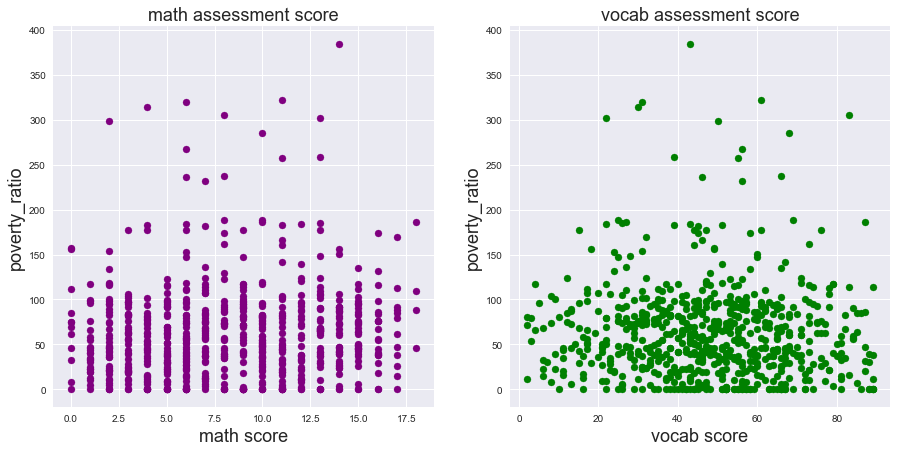

In [26]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.scatter(x=early['math'], y=early['poverty_ratio'],color='purple')
plt.ylabel('poverty_ratio', fontsize=18)
plt.xlabel('math score', fontsize=18)
plt.title('math assessment score',fontsize=18)

plt.subplot(1, 2, 2)
plt.scatter(x=early['vocab'],y=early['poverty_ratio'], color='green')
plt.ylabel('poverty_ratio',fontsize=18)
plt.xlabel('vocab score',fontsize=18)
plt.title('vocab assessment score',fontsize=18)

plt.show()

The McArthur vocab scores are clearly continous. However, the ECLS math assessment measurement scales are discrete so the math scatter plot is not interpretable.  

## Are vocabulary scores and poverty levels related?

Visual inspection of the scatterplot suggests no real positive or negative direction of the data. This is confimed by the the pearson correlation coefficent suggesting there is no relationship between poverty ratio and vocab scores based on sample data. 

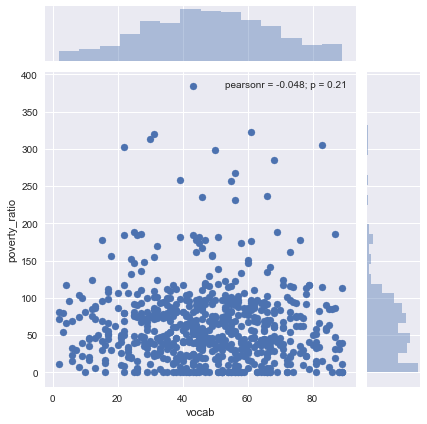

In [32]:
plt.figure(figsize=(15, 10))
g=sns.jointplot(x="vocab", y="poverty_ratio", data=early)


On further visual inspection of the joint plot it appears lower vocabulary comprehension is possibiily realted to children in deep poverty. Would filtering out all but the children from families in deep poverty create a relationship between poverty and vocabulary score?

## Are deep levels of poverty and vocabulary scores related?
> Analysis method changed to Spearman's rank correlation coefficient instead of Pearson's coefficent since the measure of deep poverty is a dichotomous variable.

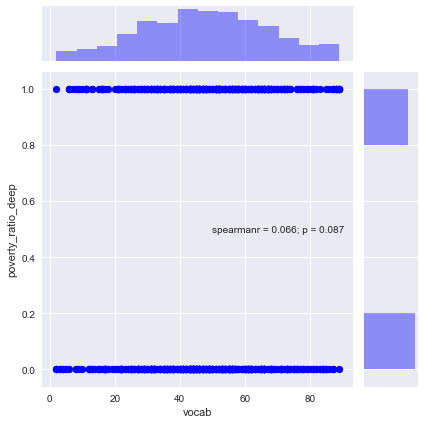

In [27]:
g = sns.jointplot("vocab", "poverty_ratio_deep", data=early, stat_func=spearmanr, color="b")

It would be much easier to see poverty levels compared to vocab scores in a bar plot.

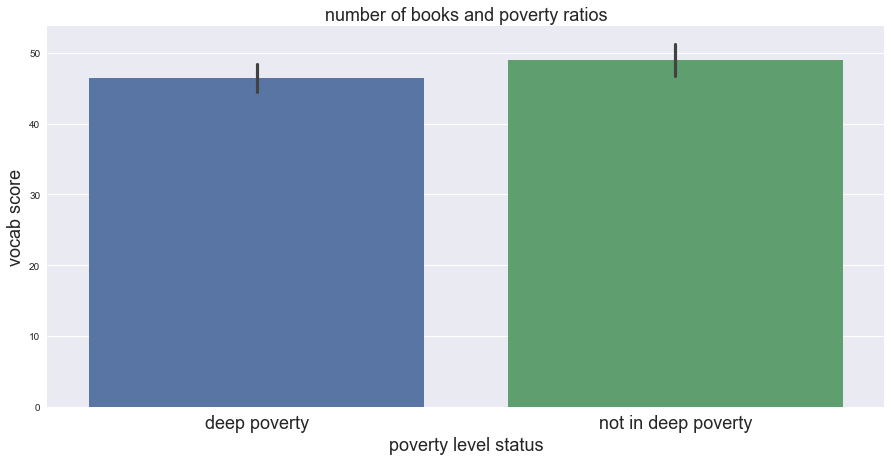

In [28]:
plt.figure(figsize=(15, 7))
abar =sns.barplot(y="vocab", x='poverty_ratio_deep',data=early)
abar.set_xticklabels(['deep poverty','not in deep poverty'],fontsize=18,rotation='horizontal')
plt.xlabel('poverty level status', fontsize=18)
plt.ylabel('vocab score', fontsize=18)
plt.title('number of books and poverty ratios', fontsize=18)
plt.show()

Students not in deep poverty performed slightly lower, on average, on the vocab assessment than students not in deep poverty. Still, it appears this difference was slight and not large enough to produce a significant result when analyzed using Spearman's rank correlation coefficient. 

# Are math scores and poverty levels related?

> The relationship between math scores and poverty ratios was analyzed using Spearman's rank correlation coefficient since the scatter plot of math's distribution revealed it was discrete. Applying a measure comparing ranked values of math and poverty ratios is appropriate in this instance. 
> Poverty levels and math scores were positivley related, meaning math scores tend to increase as poverty ratio levels also increase. This suggests children from families with higher incomes tended to score higher on the ECLS math assessment compared to children from lower income families. 

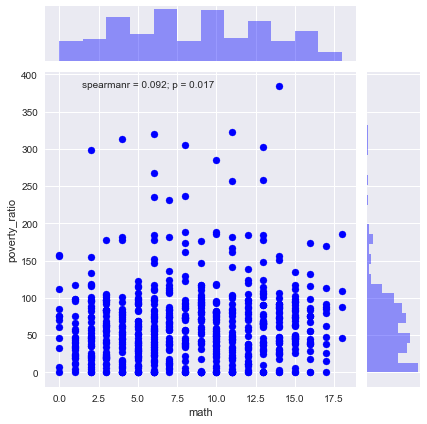

In [29]:
g = sns.jointplot("math", "poverty_ratio", data=early, stat_func=spearmanr, color="b")


# Future Directions
> Analytic Challenges:
1. Analyses in this report were limited to examining relationships between two variables. However, it's likely there are several variables significantly predicting relationships. Multiple linear regression, or regression with 2 or more predictor variables, could increase the amount of variance accounted for in academic outcomes by the predictors. Would math and vocab scores be better predictors of poverty levels when combined in the same regression?
2. Missing values were deleted listwise after being obtained from the FACES.sav file. Finding other methods to deal with missing data such as imputation increases sample size. This ensures samples are more representative of their corresponding populations. 
3. Many of the research questions in this report are answered with visual inspection. Using inferential tests, like MANOVA and regressions, increases what we can gain about group differences. 

> Theoretical Recommendations:
1. Further exploration amongnst early childhood variables is warranted for future research. Collecting data from large .SAV file
removing outliers /how to mitgate their impact.
2. A number of variables in the FACES survey were answered by parents. Including more items answered by children could offer a more holistic perspective of how children view development.
